In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
# Shows concise summary of the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [5]:
# Checking for missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on region from 122th index, we can make a new column based on the region

1. 'Bejaia Region Dataset'
2. 'Sidi-Bel Abbes Region Dataset'

Add new column with region

In [6]:
# Creating an Region Column and assigning 0 -> Bejaia Region Dataset' and 1 -> 'Sidi-Bel Abbes Region Dataset'
dataset.loc[:122,'Region'] = 0
dataset.loc[122:,'Region'] = 1
df = dataset

In [7]:
# Values in Region column is in float form, lets change it to int
df['Region'] = df['Region'].astype(int)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [10]:
# Removing the null values
df = df.dropna().reset_index(drop=True) # This will remove all the rows having missing values in the dataset.

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
# Checking this particular row found an error
df.loc[[122]] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [13]:
# Removing 122nd row from the dataset
df = df.drop(122).reset_index(drop=True)

In [14]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Yeah there are spaces in some of the column names, we are gonna fix it.

In [16]:
# Fix spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Changing the required columns datatype as integer

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


Let's change datatype of the columns from [ 'day' to 'Ws' ] as integer.

In [18]:
# These Columns will be in int type
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

## Changing the required columns datatype as float

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


Let's change the datatype of the columns from ['Rain' to 'FWI'] as float.

In [20]:
# Let's do the datatype conversion in a generic way
Objects = [feature for feature in df.columns if df[feature].dtypes == 'O']
# ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'] these are the results.

# Generic Way of Converting Columns datatype
for i in Objects:
    if i!= 'Classes': # We did this to avoid Column Called Classes to be converted as its a object type it contains String values.
        df[i] = df[i].astype(float)

In [21]:
df.head() # This is the dataset after dtype conversion.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Now this dataset is cleaned let's make a csv file of this dataset.

In [ ]:
df.to_csv('Algerian_forest_fires_Cleaned_Dataset.csv',index=False)

# Exploratory Data Analysis

In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
# Right now we are going to focus more on the columns starting from Temperature to Region.
# We dont have any use for day,month and year right now.
# Creating a df_copy dataframe with required columns. 
df_copy = df.drop(['day','month','year'],axis=1)

In [24]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### Handling Classes Column

In [25]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

We need to fix this, make so that only two values will be there 'fire' and 'not fire'.

In [26]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [27]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [28]:
df_copy['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [29]:
# Encoding the Classes column
df_copy['Classes'] = df_copy['Classes'].map({'fire': 1, 'not fire': 0})

# Alternate code
# df_copy['Classes'] = np.where(df_copy['Classes'] == 'not fire',0,1)
# This checks if column 'Classes' have 'not fire' then assign it as 0 and if its not 'not fire' then its 'fire' assign it as 1.

In [30]:
# Categories in Classes Column
df_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [31]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [32]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


# Visualizations

In [33]:
# Styles for use:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Histplots For Numerical Features

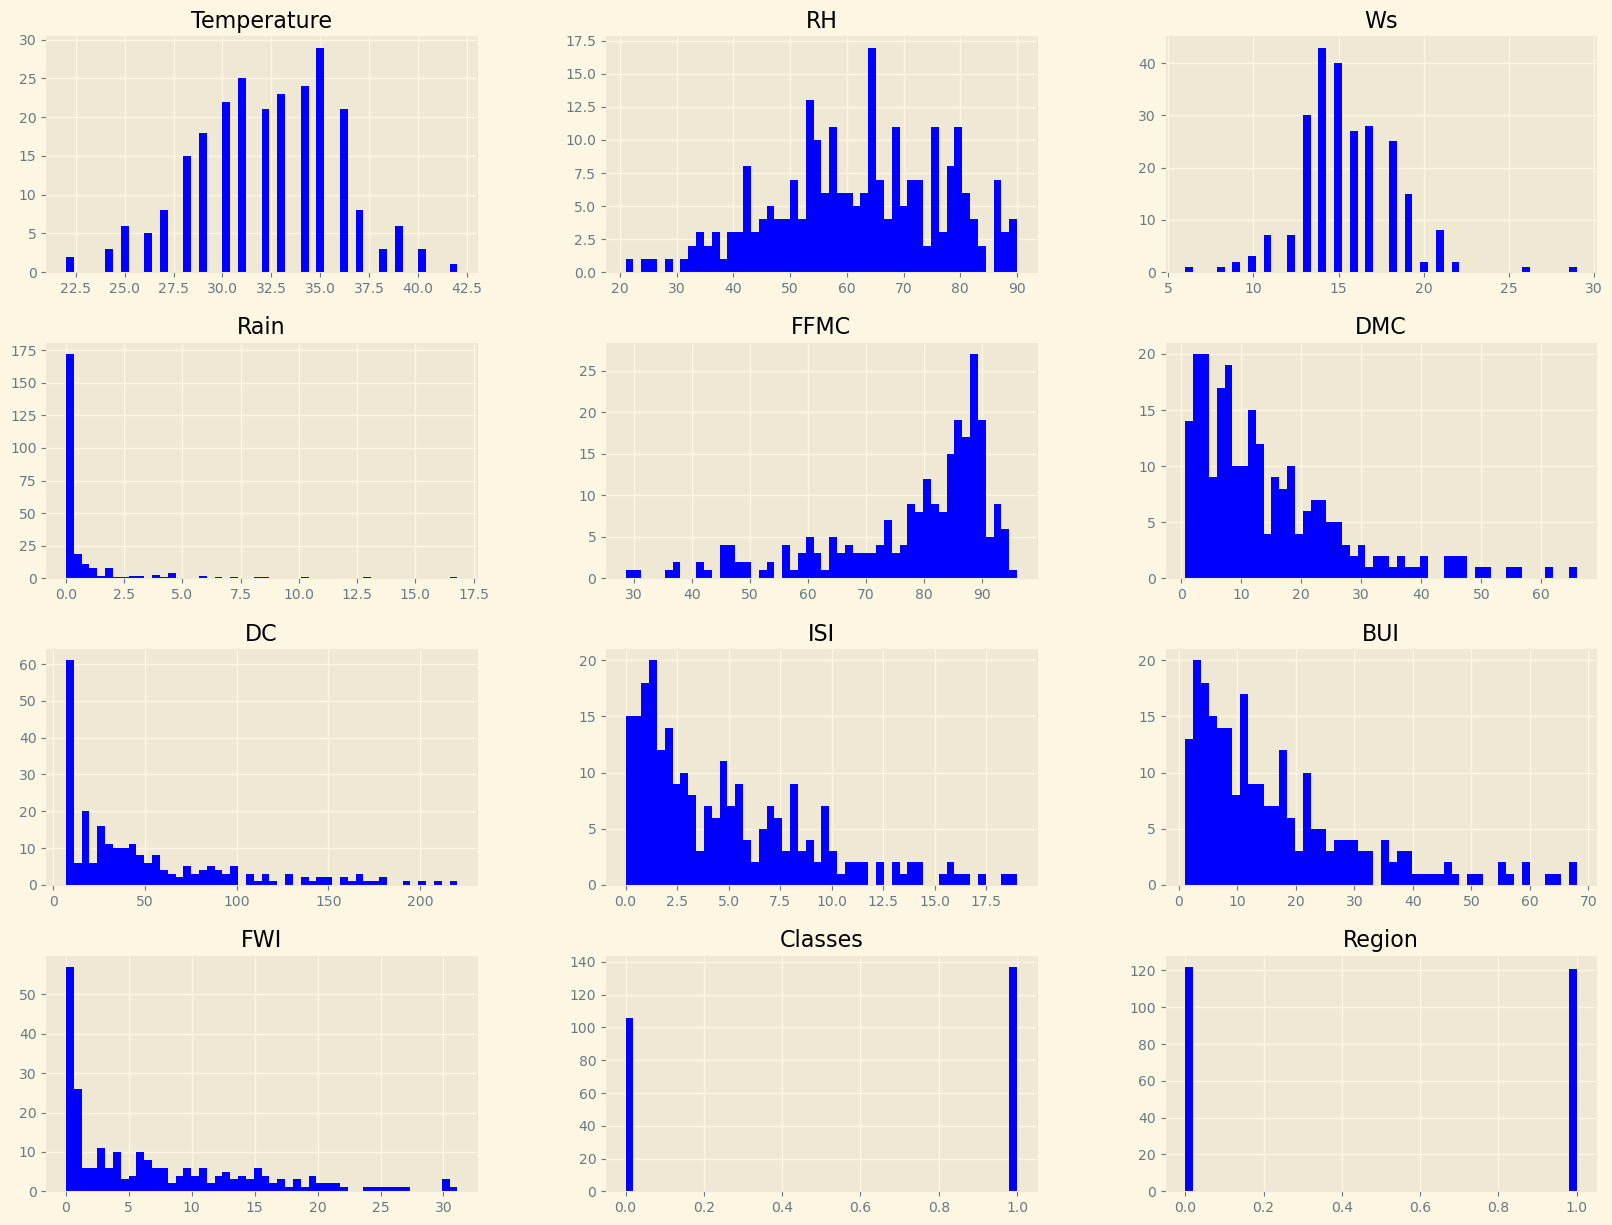

In [34]:
# Plot density plot for all features
plt.style.use('Solarize_Light2')
df_copy.hist(bins=50,figsize=(20,15),color='blue')
plt.show()

### Pie Chart To Show Classes Distribution

In [35]:
# Percentage for Pie chart(Classes)
percentage = df_copy['Classes'].value_counts(normalize=True)*100

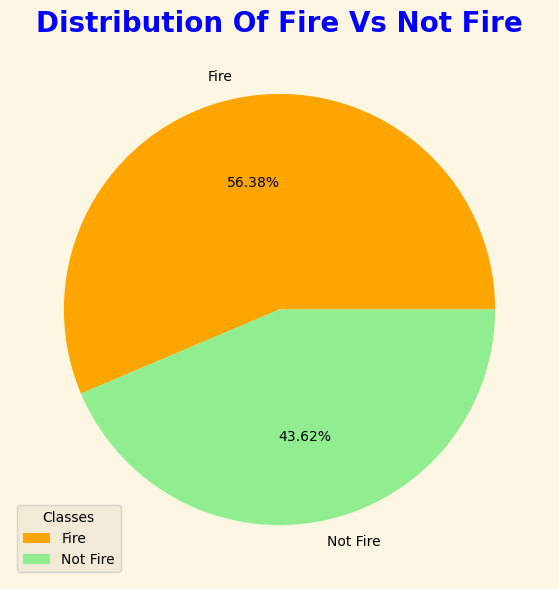

In [36]:
# Ploting a Pie Chart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,colors=['Orange','lightgreen'],autopct='%1.2f%%')
plt.title('Distribution Of Fire Vs Not Fire',fontweight='bold',fontsize=20,color='b')
plt.legend(title='Classes',loc=3)
plt.show()

### Correlation Between Independent And Dependent Features

In [37]:
# Correlation
df_copy.corr()
# When two features are inversly proportional(means having -ve correlation) to each other 
# like when RH with temperature gives -0.651400 that basically means when RH value increases Temperature decreases.

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


Text(0.5, 1.0, 'Correlation Between Differnt Features')

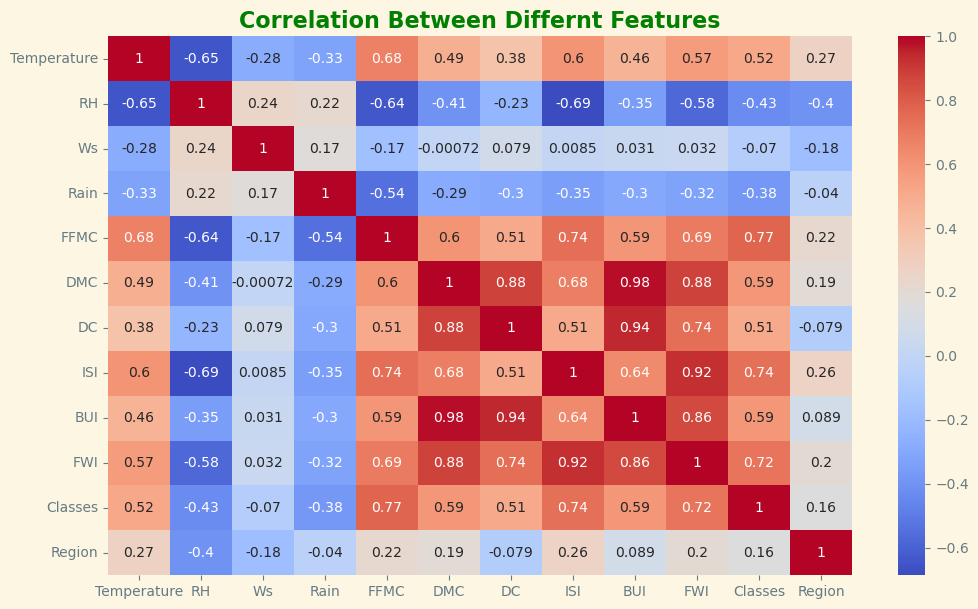

In [38]:
plt.figure(figsize=(12,7))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Between Differnt Features',fontweight='bold',color='green')

Finding - > So FWI is our o/p feature and appart from RH and Rain columns all the remaining columns have +ve Correlation with FWI column.

### BoxPlot To Show Outliers In O/P Feature

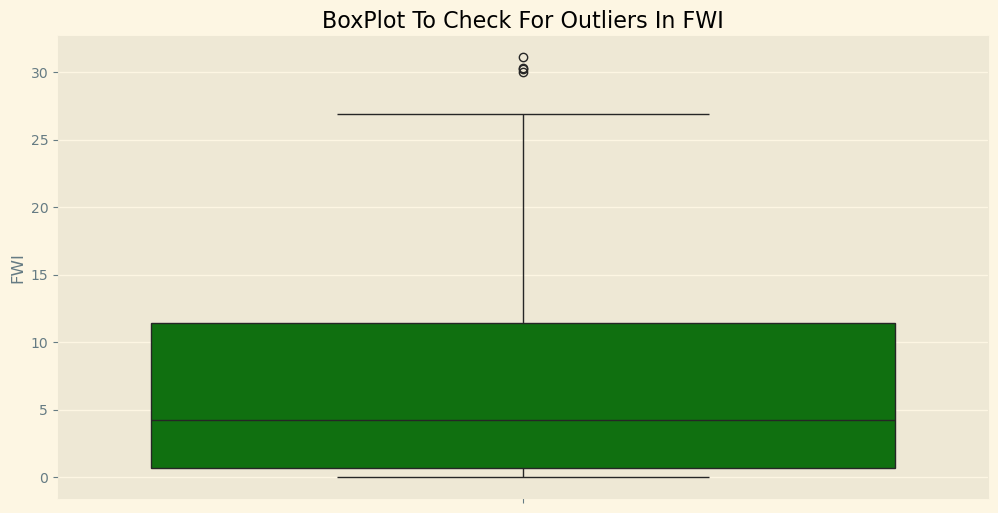

In [39]:
# Box plot for FWI (Output Feature)
plt.figure(figsize=(12,6))
sns.boxplot(df_copy['FWI'],color='green')
plt.title('BoxPlot To Check For Outliers In FWI')
plt.show()

In [40]:
df['month'].unique()

array([6, 7, 8, 9])

### Monthly Fire Analysis

In [41]:
# Fixing the original Classes Column from df as we will use this in a plot
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [42]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

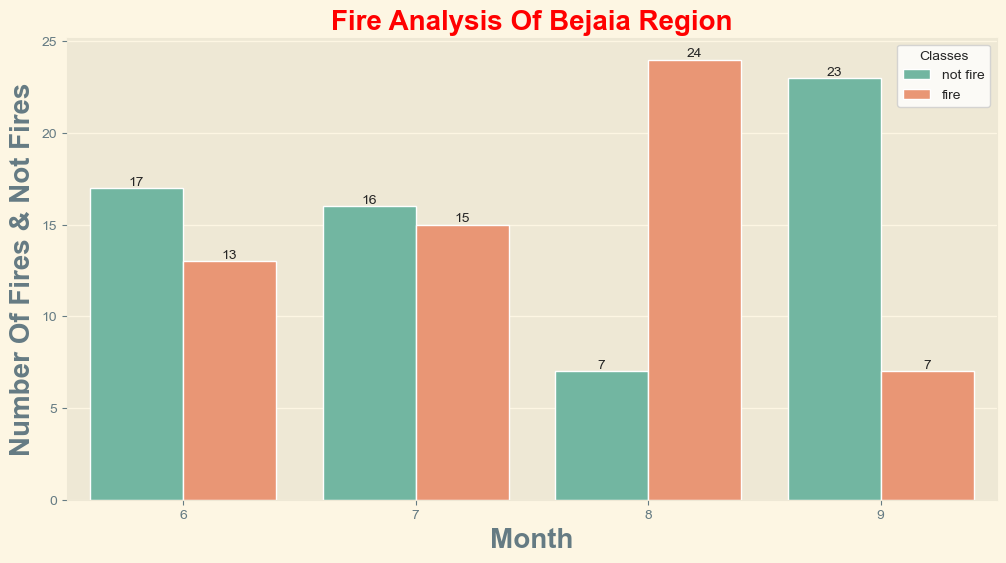

In [ ]:
# Fire Analysis For Bejaia Region
dftemp_bejaia = df.loc[df['Region'] == 0] # Separating Regions this is bejaia region
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='Classes',data=dftemp_bejaia,palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Fire Analysis Of Bejaia Region',fontweight='bold',color='r',fontsize=20)
plt.xlabel('Month',fontweight='bold',fontsize=20)
plt.ylabel('Number Of Fires & Not Fires',fontweight='bold',fontsize=20)
plt.show()

# 🔍 Key Observations:
1. 🔥 August (Month 8) is the fire hotspot:
    - 24 fire incidents vs only 7 non-fire cases
    - This sharp spike suggests August has the most extreme fire conditions — possibly due to peak summer heat, dry vegetation, or low humidity.
2. 📉 July (Month 7) shows a dip in fire activity:
    - Only 15 fire cases compared to 16 non-fire
    - Here both the cases are almost close like not fire and fire cases are only 1 count apart.
3. 📊 June and September are more balanced:
    - June: 13 fires vs 17 non-fires
    - September: 7 fires vs 23 non-fires
    - These months show moderate or low fire activity, possibly marking the start and end of the fire season.

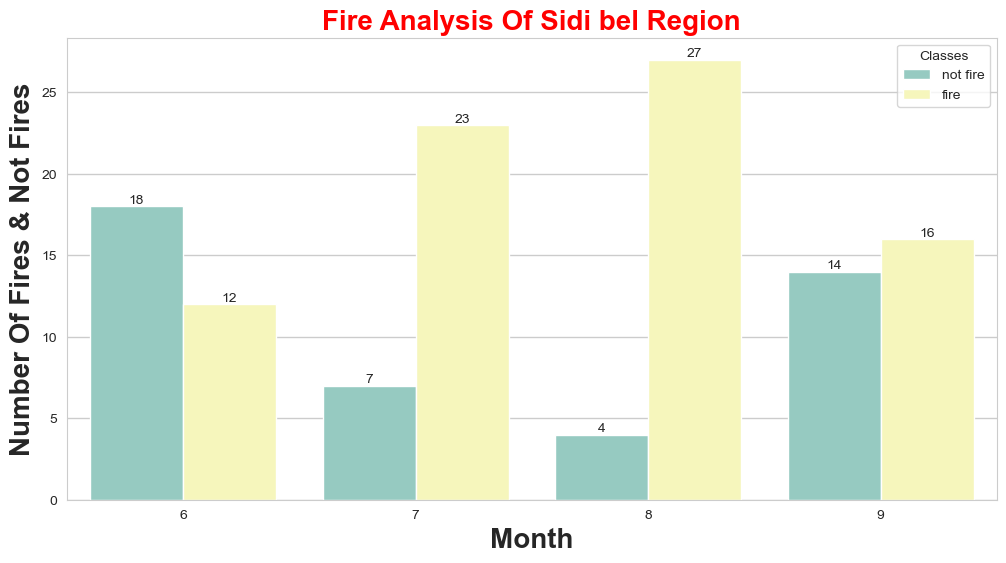

In [ ]:
# Fire Analysis For Sidi bel Region
dftemp_sidi_bel = df.loc[df['Region'] == 1] # Separating Regions this is bejaia region
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='Classes',data=dftemp_sidi_bel,palette='Set3')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Fire Analysis Of Sidi bel Region',fontweight='bold',color='r',fontsize=20)
plt.xlabel('Month',fontweight='bold',fontsize=20)
plt.ylabel('Number Of Fires & Not Fires',fontweight='bold',fontsize=20)
plt.show()

# 🔍 Key Observations:
1. 🔥 August (Month 8) shows the highest fire activity:
    - 27 fire incidents vs only 4 non-fire cases
    - This sharp imbalance indicates that August is the most fire-prone month in the Sidi bel region, likely due to peak summer conditions such as high temperature and low humidity.
2. 📈 July (Month 7) also has elevated fire risk:
    - 23 fires and just 7 non-fires
    - This suggests that the fire season intensifies in mid-summer, possibly due to cumulative dryness or wind patterns.
3. 📉 June and September are relatively balanced:
    - June: 12 fires vs 18 non-fires
    - September: 16 fires vs 14 non-fires
    - These months may represent the start and tapering off of the fire season, with more moderate conditions.